In [95]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import zipfile
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [96]:
# mengimport dataset menggunakan kaggle

!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
zipfile_name = 'bank-customer-churn.zip'
with zipfile.ZipFile(zipfile_name,'r') as file:
    file.extractall()

In [98]:
data = pd.read_csv('Customer-Churn-Records.csv')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [100]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [101]:
# Meriksa apakah ada data yang kosong
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [102]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [103]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

<AxesSubplot:>

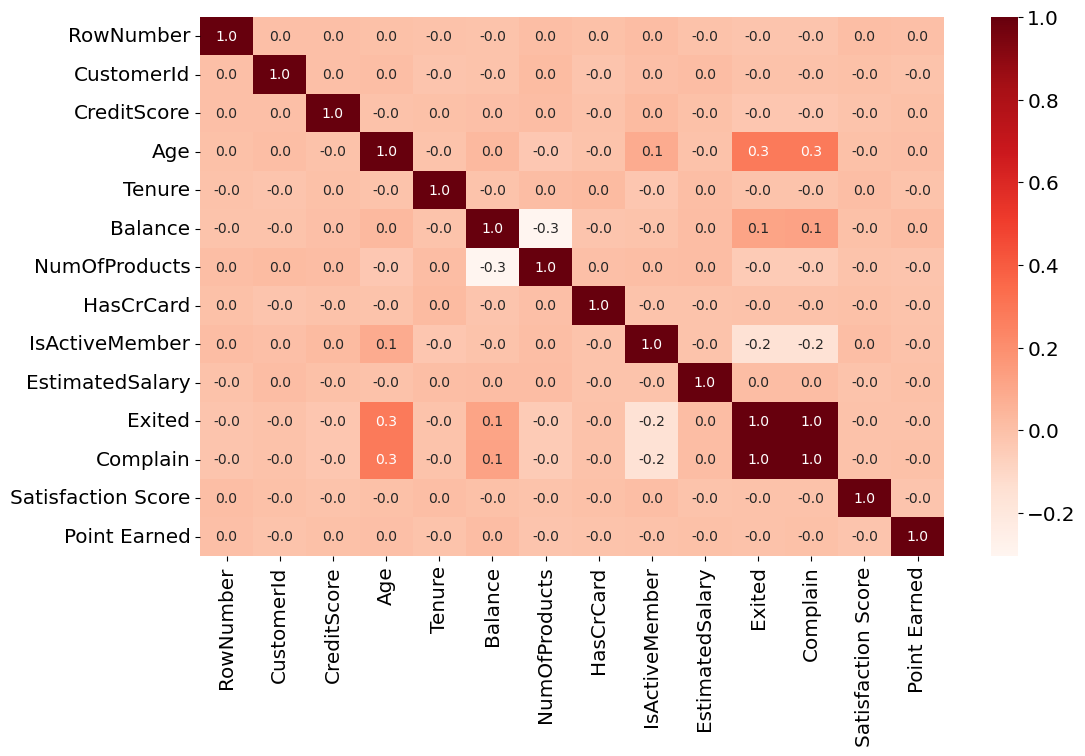

In [104]:
sns.heatmap(data.corr('pearson'), cmap='Reds', annot=True, fmt='.1f')

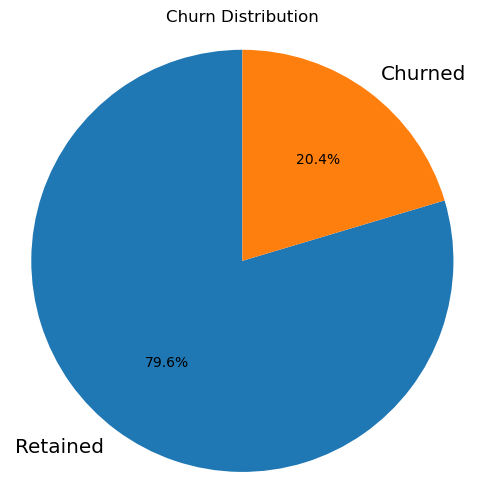

In [105]:
# Churn distribution
plt.figure(figsize=(6, 6))
churn_counts = data['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

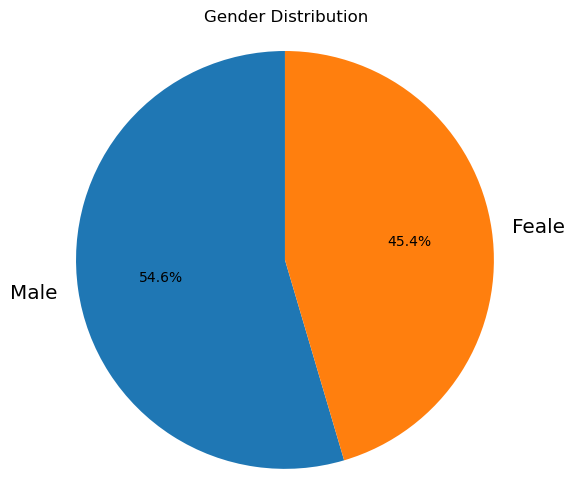

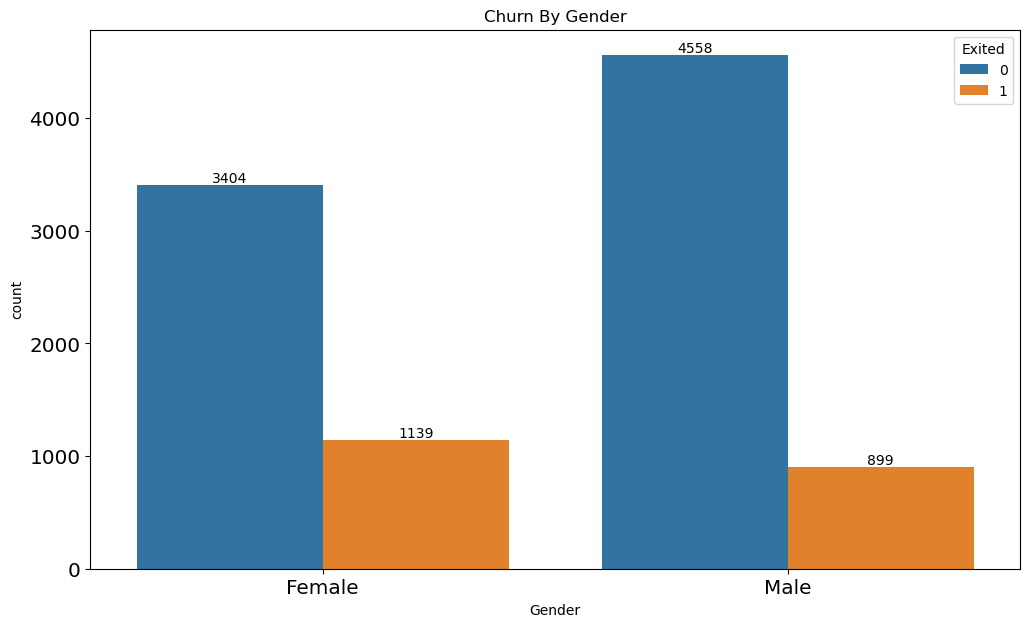

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


In [106]:
# Gender  distribution
plt.figure(figsize=(6, 6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Feale'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

plt.title('Churn By Gender')
ax=sns.countplot(x='Gender', hue='Exited', data=data)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

churn_rate_gender = data.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)


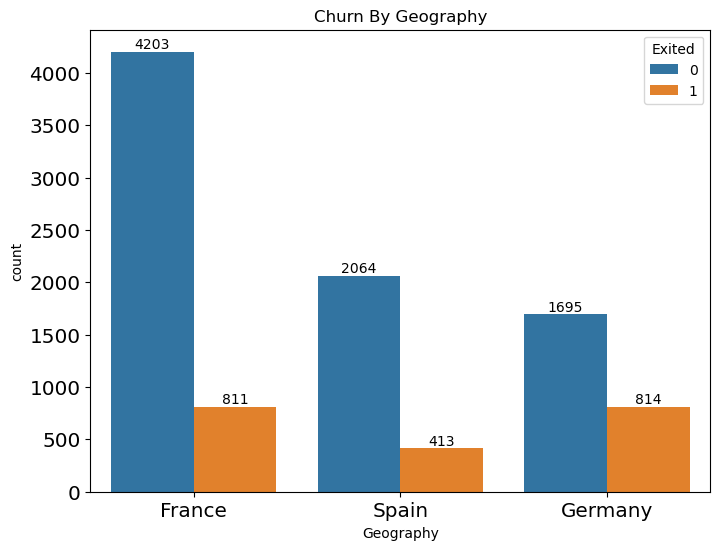

In [107]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn By Geography')


# plt.text(s='Jumlah pembelian pada pria maupun wanita tidak memiliki perbedaan yang signifikan ', 
#             x=1.6,y=5500,fontsize=15,ha='left')
# plt.text(s='dimana pembelian pada wanita lebih banyak 91 barang dimana ini hanya 0,01% dari total data',
#           x=1.6,y=5200,fontsize=14,ha='left')

for i in ax.containers :
    ax.bar_label(i,)
plt.show()

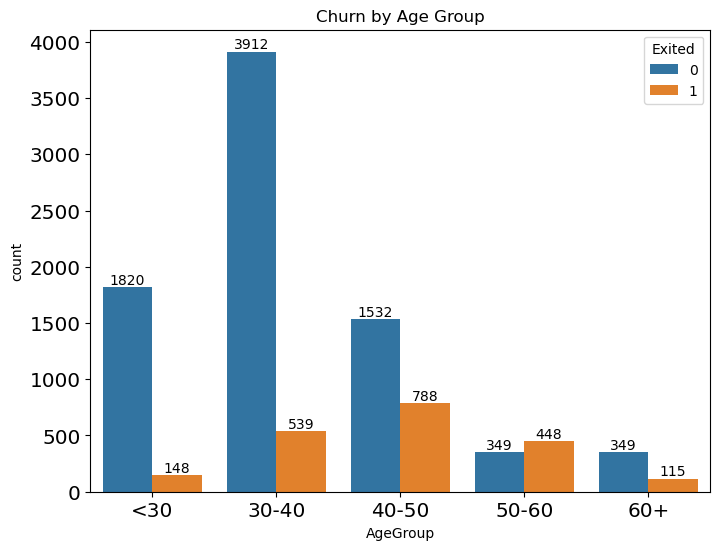

In [108]:
# Churn by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='AgeGroup', hue='Exited', data=data)
plt.title('Churn by Age Group')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

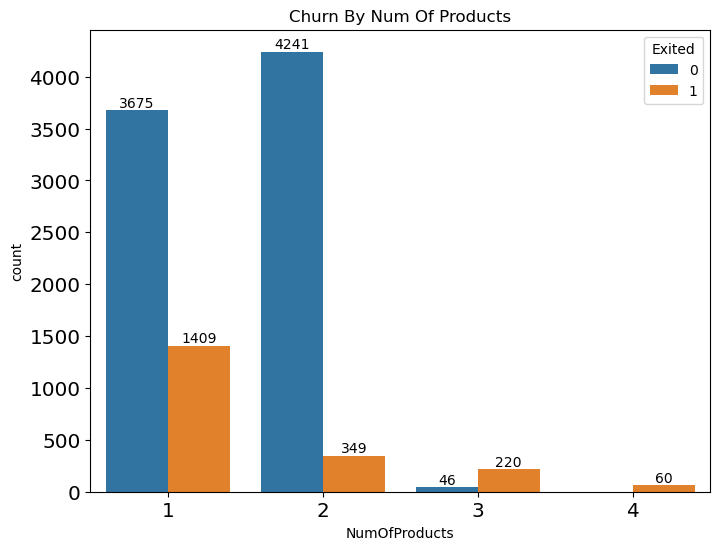

In [109]:
# Churn by age group
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn By Num Of Products')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

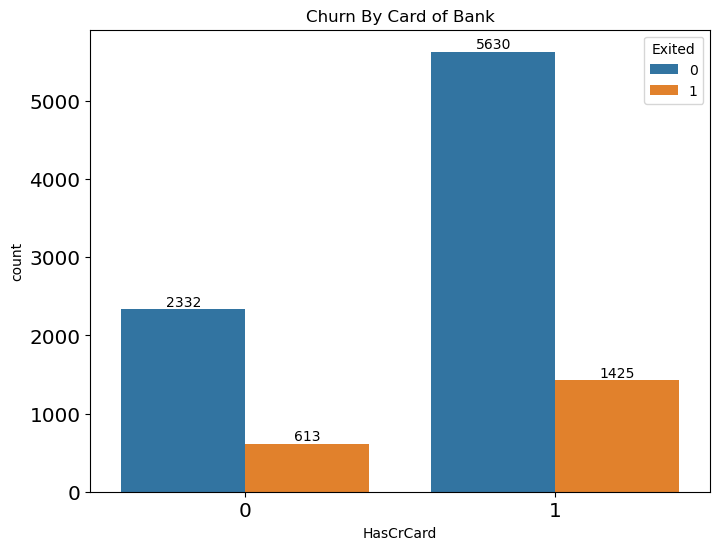

In [110]:
# Churn by Card of bank 
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Churn By Card of Bank')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

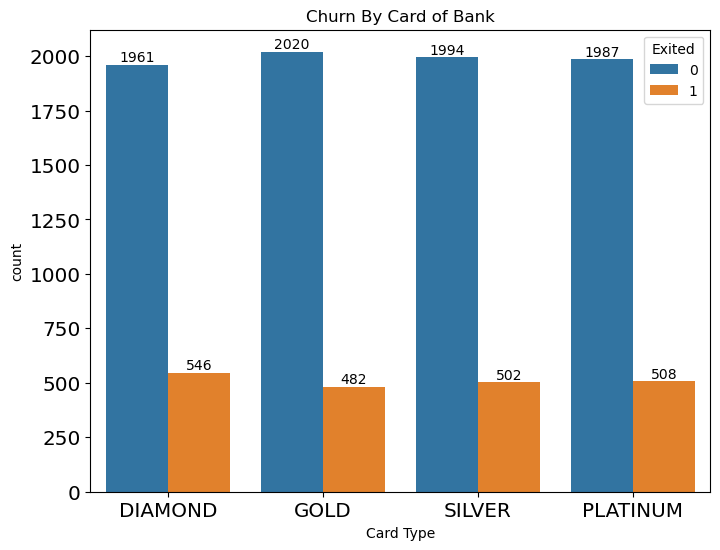

In [111]:
# Churn by Card of bank 
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='Card Type', hue='Exited', data=data)
plt.title('Churn By Card of Bank')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

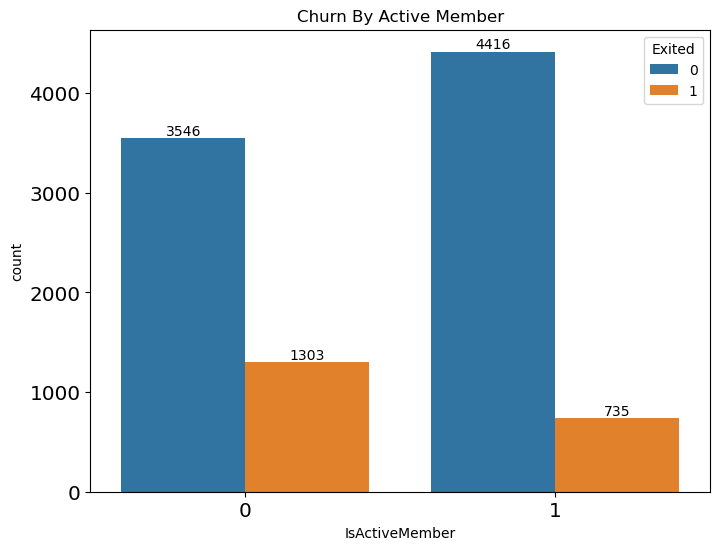

In [112]:
# Churn by Card of bank 
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn By Active Member')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

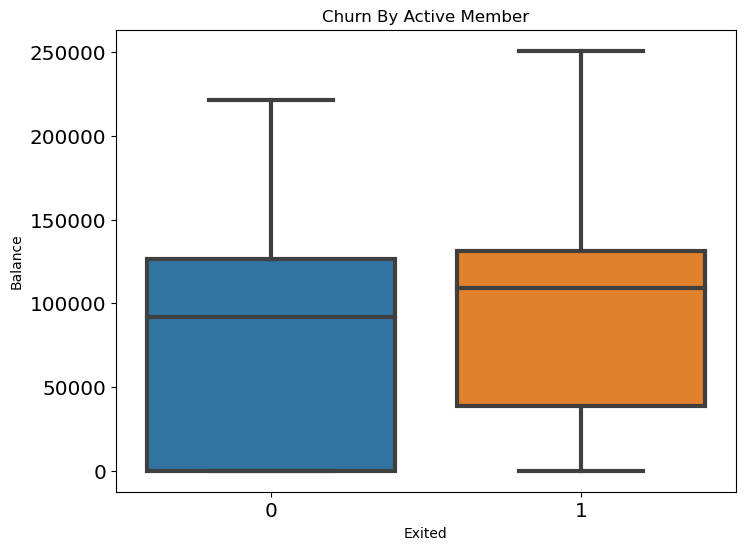

In [113]:
# Churn by Card of bank 
plt.figure(figsize=(8, 6))
ax=sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn By Active Member')

for  i in ax.containers :
    ax.bar_label(i,)
plt.show()

<AxesSubplot:>

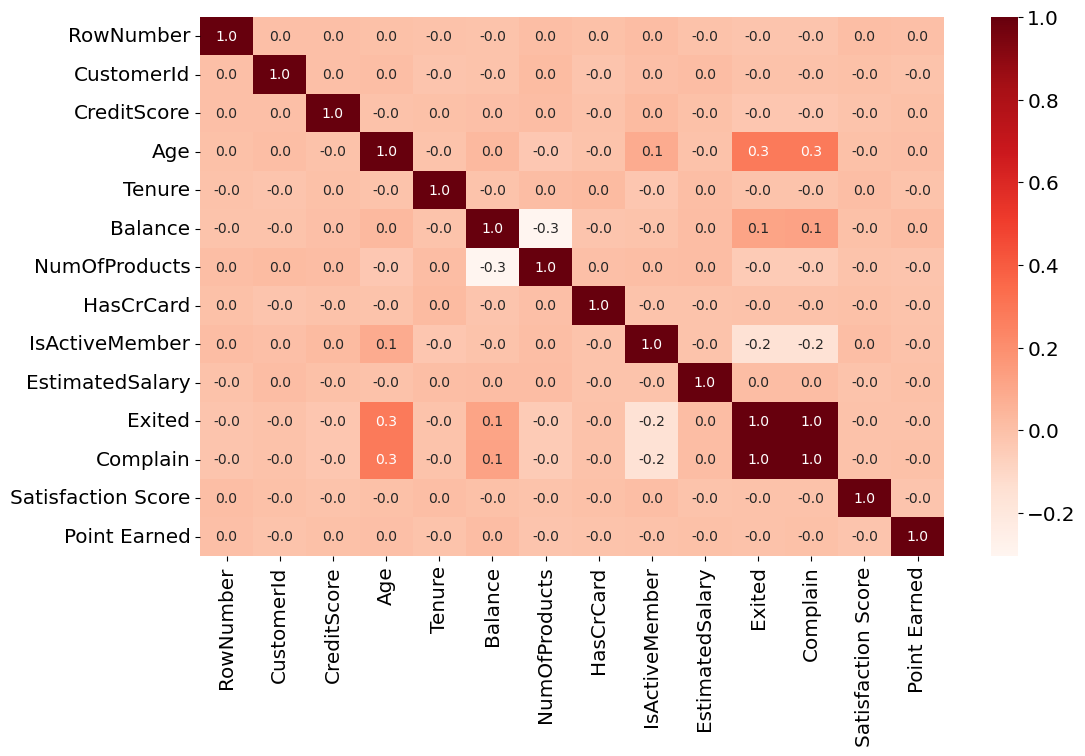

In [114]:
sns.heatmap(data.corr('pearson'), cmap='Reds', annot=True, fmt='.1f')

<AxesSubplot:xlabel='Age'>

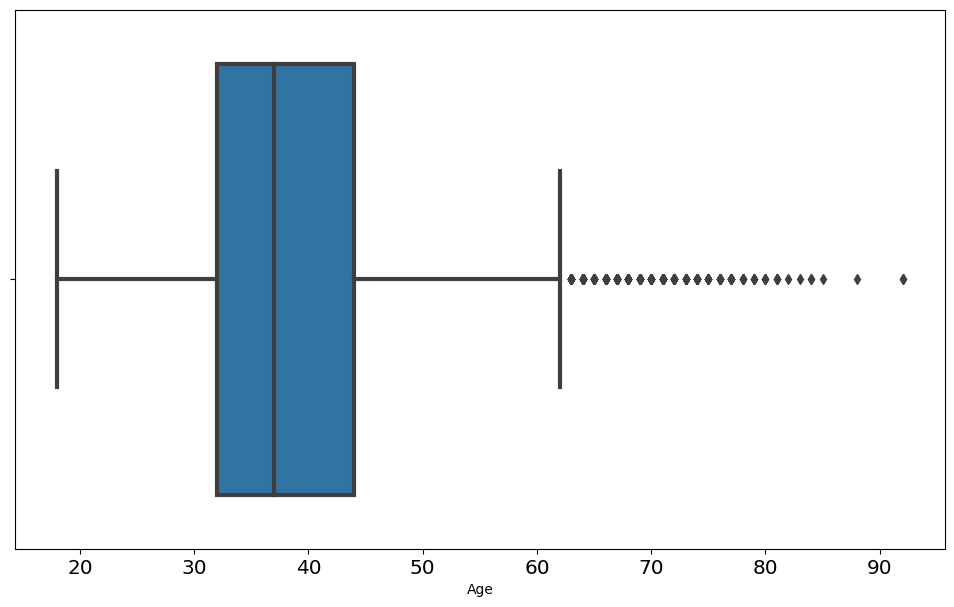

In [115]:
sns.boxplot(data['Age'])

In [84]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


In [117]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [120]:
data['Gender'] = LE.fit_transform(data['Gender'])
data['Geography'] = LE.fit_transform(data['Geography'])
data['Card Type'] = LE.fit_transform(data['Card Type'])

In [122]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,40-50
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,40-50
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,40-50
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,30-40
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,40-50


In [124]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'AgeGroup'],
      dtype='object')

In [126]:
X = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score','Card Type','Point Earned',]]


In [128]:
y = data[['Exited']]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler
STD = StandardScaler()
X_train_STD = STD.fit_transform(X_train)
X_test_STD = STD.transform(X_test)


In [131]:
y_train_1d = np.ravel(y_train)

In [137]:
# !pip install hyperopt

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
LR = LogisticRegression()

In [138]:
space = {
    'C' : hp.uniform('C',1,5),
    'solver' : hp.choice('solver',['sag', 'saga']),
    'max_iter' : hp.quniform('max_iter',100,500,50)
}

In [139]:
def Bayesian(space):
  LR = LogisticRegression(
      C = float(space['C']),
      solver = space['solver'],
      max_iter = int(space['max_iter'])
  )
  accuracy = cross_val_score(LR,X_train_STD,y_train_1d,cv=10).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [148]:
trials = Trials

In [149]:
Best = fmin(fn=Bayesian,space=space,algo=tpe.suggest,trials=trials,max_evals=200)

100%|██████████| 200/200 [01:16<00:00,  2.63trial/s, best loss: -0.9985000000000002]


In [150]:
Best

{'C': 2.9119652705058314, 'max_iter': 150.0, 'solver': 1}

In [151]:
LR = LogisticRegression(C=1.4801916731951192 , max_iter = 450 , solver = 'sag')
LR.fit(X_train_STD,y_train_1d)

LogisticRegression(C=1.4801916731951192, max_iter=450, solver='sag')

In [152]:
y_hat = LR.predict(X_test_STD)

In [160]:
#!pip install scikit-learn

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
print(accuracy_score(y_test,y_hat))

0.999


In [159]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [161]:
print(confusion_matrix(y_test,y_hat))

[[1606    1]
 [   1  392]]


In [166]:
!pip install streamlit

     ---------------------------------------- 8.9/8.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 21.5/21.5 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 184.3/184.3 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 239.4/239.4 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 471.5/471.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
